Data source: https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database 

# Import Libraries

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
for files in os.listdir():
    if files.endswith('.csv'):
        print(files)

brands.csv
categories.csv
customers.csv
orders.csv
order_items.csv
products.csv
staffs.csv
stocks.csv
stores.csv


In [4]:
for files in os.listdir():  
    if files.endswith('.csv'):
        print(files)
        df = pd.read_csv(files)
        df.info()
        print("-"*100)

brands.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand_id    9 non-null      int64 
 1   brand_name  9 non-null      object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes
----------------------------------------------------------------------------------------------------
categories.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    7 non-null      int64 
 1   category_name  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
----------------------------------------------------------------------------------------------------
customers.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 9 columns):
 #   Colum

# ETL (Extract, Transform, Load)

## Extract Data

In [5]:
brands = pd.read_csv('brands.csv')
categories = pd.read_csv('categories.csv')
customers = pd.read_csv('customers.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
staffs = pd.read_csv('staffs.csv')
stocks = pd.read_csv('stocks.csv')
stores = pd.read_csv('stores.csv')

In [34]:
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [37]:
categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [36]:
customers

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [38]:
order_items

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


In [39]:
orders

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,NaN,2,7
1611,1612,3,3,2018-10-21,2018-10-21,NaN,1,3
1612,1613,1,3,2018-11-18,2018-11-18,NaN,2,6
1613,1614,135,3,2018-11-28,2018-11-28,NaN,3,8


In [8]:
orders["order_status"].value_counts()

4    1445
2      63
1      62
3      45
Name: order_status, dtype: int64

In [40]:
products

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [6]:
staffs

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [7]:
staffs["active"].value_counts()

1    10
Name: active, dtype: int64

In [15]:
stores

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


In [105]:
stocks

,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
...,...,...,...
934,3,309,30
935,3,310,8
936,3,311,23
937,3,312,18


## Load Data

In [10]:
conn = sqlite3.connect('mydb.sqlite')

brands.to_sql('brands', conn, index=False, if_exists='replace')
categories.to_sql('categories', conn, index=False, if_exists='replace')
customers.to_sql('customers', conn, index=False, if_exists='replace')
order_items.to_sql('order_items', conn, index=False, if_exists='replace')
orders.to_sql('orders', conn, index=False, if_exists='replace')
products.to_sql('products', conn, index=False, if_exists='replace')
staffs.to_sql('staffs', conn, index=False, if_exists='replace')
stocks.to_sql('stocks', conn, index=False, if_exists='replace')
stores.to_sql('stores', conn, index=False, if_exists='replace')

3

# Query Data

In [ ]:
# List all customers from a specific city

query_1 = """
SELECT *
FROM customers
WHERE city = 'Santa Cruz'
"""
pd.read_sql(query, conn)

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,194,Dorine,Roberson,None,dorine.roberson@msn.com,396 Meadowbrook Lane,Santa Cruz,CA,95060
1,476,Christopher,Richardson,None,christopher.richardson@gmail.com,7846 Windfall Dr.,Santa Cruz,CA,95060
2,712,Kecia,Olsen,None,kecia.olsen@msn.com,8389 Central St.,Santa Cruz,CA,95060
3,1415,Harold,O'connor,None,harold.o'connor@gmail.com,9530 Summerhouse Street,Santa Cruz,CA,95060
4,1428,Carola,Johns,None,carola.johns@msn.com,7077 Fordham Rd.,Santa Cruz,CA,95060


In [50]:
# List all product categories

query = """
SELECT *
FROM categories
"""
pd.read_sql(query, conn)

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
# Calculate total net revenue from all orders (assuming net revenue = list_price * quantity * (1 - discount))

query = """
SELECT SUM(list_price*quantity*(1-discount)) AS total_net_revenue
FROM order_items
"""
pd.read_sql(query, conn)

,total_net_revenue
0,7.689117e+06


In [13]:
# Top stores by net revenue

query = """
WITH first_join AS (
  SELECT 
      s.store_id,
      s.store_name,
      o.order_id
  FROM orders o
  JOIN stores s ON o.store_id = s.store_id
)
SELECT 
    f.store_name,
    SUM(oi.list_price * oi.quantity * (1 - oi.discount)) AS net_revenue
FROM first_join f
JOIN order_items oi ON f.order_id = oi.order_id
GROUP BY f.store_name
ORDER BY net_revenue DESC;
"""
pd.read_sql(query, conn)

,store_name,net_revenue
0,Baldwin Bikes,5.215751e+06
1,Santa Cruz Bikes,1.605823e+06
2,Rowlett Bikes,8.675422e+05


In [101]:
# Find the top 5 best-selling products by quantity

query = """
SELECT p.product_name AS best_selling_products, SUM(oi.quantity) as total_quantity_sold
FROM products p
INNER JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
"""
pd.read_sql(query, conn)

,best_selling_products,total_quantity_sold
0,Electra Cruiser 1 (24-Inch) - 2016,296
1,Electra Townie Original 7D EQ - 2016,290
2,Electra Townie Original 21D - 2016,289
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269
4,Surly Ice Cream Truck Frameset - 2016,167


In [ ]:
# Find the top 5 best-selling products by gross revenue

query = """
SELECT product_name AS best_revenue_generating_products, SUM(list_price) as total_gross_revenue
FROM products
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
"""
pd.read_sql(query, conn)

# Key takeaway: Trek Domane SLR 9 Disc has the highest gross revenue

,best_revenue_generating_products,total_gross_revenue
0,Trek Domane SLR 9 Disc - 2018,11999.99
1,Electra Townie Go! 8i - 2017/2018,7799.97
2,Trek Domane SLR 8 Disc - 2018,7499.99
3,Trek Silque SLR 8 Women's - 2017,6499.99
4,Trek Emonda SLR 8 - 2018,6499.99


In [69]:
# Find the top 5 best-selling products by net revenue

query = """
SELECT p.product_name, SUM(oi.list_price*oi.quantity - oi.list_price*oi.quantity*oi.discount) as net_revenue
FROM products p
INNER JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_name
ORDER BY net_revenue DESC
LIMIT 5
"""
pd.read_sql(query, conn)

# Key takeaway: Trek Slash 8 27.5 has the highest net revenue

,product_name,net_revenue
0,Trek Slash 8 27.5 - 2016,555558.6111
1,Trek Conduit+ - 2016,389248.7025
2,Trek Fuel EX 8 29 - 2016,368472.7294
3,Surly Straggler 650b - 2016,226765.5510
4,Trek Domane SLR 6 Disc - 2017,211584.6153


In [35]:
# Calculate average order value per customer

query = """
SELECT 
    c.customer_id,
    c.first_name,
    c.last_name,
    AVG(oi.list_price * oi.quantity * (1 - oi.discount)) AS avg_order_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id
ORDER BY avg_order_value DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

# key takeaway: customer 905 has the highest average order value

,customer_id,first_name,last_name,avg_order_value
0,905,Hae,Ramirez,12089.9814
1,329,Marilyn,Frank,9499.9810
2,1445,Ester,Acevedo,7999.9840
3,1370,Rona,Rojas,7439.9814
4,390,Lorrie,Pollard,7439.9814


In [ ]:
# Find products that are out of stock in all stores

query = """
SELECT 
    p.product_name,
    p.product_id,
    MAX(CASE WHEN s.store_id = 1 THEN 1 ELSE 0 END) AS store_1,
    MAX(CASE WHEN s.store_id = 2 THEN 1 ELSE 0 END) AS store_2,
    MAX(CASE WHEN s.store_id = 3 THEN 1 ELSE 0 END) AS store_3
FROM products p
LEFT JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_name, p.product_id
HAVING 
    MAX(CASE WHEN s.store_id = 1 THEN 1 ELSE 0 END) = 0
    AND MAX(CASE WHEN s.store_id = 2 THEN 1 ELSE 0 END) = 0
    AND MAX(CASE WHEN s.store_id = 3 THEN 1 ELSE 0 END) = 0
ORDER BY p.product_id;
"""
pd.read_sql(query, conn)

# Key takeaway: products that are out of stock in all stores are 314, 315, 316, 317, 318, 319, 320, and 321

,product_name,product_id,store_1,store_2,store_3
0,Electra Townie Original 21D EQ Ladies' - 2018,314,0,0,0
1,Electra Townie Original 21D Ladies' - 2018,315,0,0,0
2,Trek Checkpoint ALR 4 Women's - 2019,316,0,0,0
3,Trek Checkpoint ALR 5 - 2019,317,0,0,0
4,Trek Checkpoint ALR 5 Women's - 2019,318,0,0,0
5,Trek Checkpoint SL 5 Women's - 2019,319,0,0,0
6,Trek Checkpoint SL 6 - 2019,320,0,0,0
7,Trek Checkpoint ALR Frameset - 2019,321,0,0,0


In [ ]:
# Display total sales per store

query = """
SELECT 
    s.store_name,
    SUM(oi.list_price * oi.quantity * (1 - oi.discount)) AS total_sales
FROM stores s
JOIN orders o ON s.store_id = o.store_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY s.store_name
ORDER BY total_sales DESC;
"""
pd.read_sql(query, conn)

# Key takeaway: Baldwin Bikes has the highest sales

,store_name,total_sales
0,Baldwin Bikes,5.215751e+06
1,Santa Cruz Bikes,1.605823e+06
2,Rowlett Bikes,8.675422e+05


In [ ]:
# Calculate total inventory value per store

query = """
SELECT 
    stores.store_name,
    SUM(stocks.quantity * products.list_price) AS total_inventory_value
FROM stocks
JOIN products ON stocks.product_id = products.product_id
JOIN stores ON stocks.store_id = stores.store_id
GROUP BY stores.store_name
ORDER BY total_inventory_value DESC;
"""
pd.read_sql(query, conn)

# Key takeaway: Rowlett Bikes has the highest inventory value

,store_name,total_inventory_value
0,Rowlett Bikes,6859214.21
1,Santa Cruz Bikes,6487242.16
2,Baldwin Bikes,6473126.28


In [ ]:
# Find staff members who haven't processed any orders

query = """
SELECT 
    s.first_name,
    s.last_name
FROM staffs s
LEFT JOIN orders o ON s.staff_id = o.staff_id
WHERE o.order_id IS NULL;
"""
pd.read_sql(query, conn)

# Key takeaway: staff members who haven't processed any orders are Fabiola Jackson, Virgie Wiggins, Jannette David, and Bernardine Houston

,first_name,last_name
0,Fabiola,Jackson
1,Virgie,Wiggins
2,Jannette,David
3,Bernardine,Houston


In [ ]:
# List customers who have never placed an order

query = """
SELECT 
    c.first_name,
    c.last_name
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
WHERE o.order_id IS NULL;
"""
pd.read_sql(query, conn)

# Key takeaway: no customer has never placed an order

,first_name,last_name


In [ ]:
# Find products available in only one store

query = """
SELECT 
    p.product_name,
    COUNT(DISTINCT s.store_id) AS num_stores
FROM products p
JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_name
HAVING COUNT(DISTINCT s.store_id) = 1
ORDER BY p.product_id;
"""
pd.read_sql(query, conn)

# Key takeaway: no product is available in only one store

,product_name,num_stores


In [ ]:
# Show customers who placed more than 3 orders

query = """
SELECT 
    c.first_name,
    c.last_name,
    COUNT(o.order_id) AS num_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
HAVING COUNT(o.order_id) > 3
ORDER BY num_orders DESC;
"""
pd.read_sql(query, conn)

# Key takeaway: no customer placed more than 3 orders

,first_name,last_name,num_orders


In [55]:
# Calculate discount percentage applied to each order item

query = """
SELECT 
    o.order_id,
    oi.item_id,
    oi.product_id,
    oi.list_price,
    oi.discount,
    ROUND(oi.discount * 100, 2) AS discount_percentage
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
ORDER BY 6 ASC;
"""
pd.read_sql(query, conn)

,order_id,item_id,product_id,list_price,discount,discount_percentage
0,1,3,10,1549.00,0.05,5.0
1,1,4,16,599.99,0.05,5.0
2,2,2,16,599.99,0.05,5.0
3,3,1,3,999.99,0.05,5.0
4,3,2,20,599.99,0.05,5.0
...,...,...,...,...,...,...
4717,1611,3,236,749.99,0.20,20.0
4718,1612,3,101,339.99,0.20,20.0
4719,1614,3,213,269.99,0.20,20.0
4720,1615,1,197,2299.99,0.20,20.0


In [51]:
# Find the most expensive product in each category

query = """
SELECT 
    c.category_name,
    p.product_name,
    MAX(p.list_price) AS max_price
FROM categories c
JOIN products p ON c.category_id = p.category_id
GROUP BY c.category_name
ORDER BY max_price DESC;
"""
pd.read_sql(query, conn)

# Key takeaway: the most expensive product in the category Road Bikes is 11999.99

,category_name,product_name,max_price
0,Road Bikes,Trek Domane SLR 9 Disc - 2018,11999.99
1,Mountain Bikes,Trek Fuel EX 9.8 27.5 Plus - 2017,5299.99
2,Electric Bikes,Trek Powerfly 7 FS - 2018,4999.99
3,Cyclocross Bicycles,Trek Boone 7 Disc - 2018,3999.99
4,Cruisers Bicycles,Electra Townie Commute Go! - 2018,2999.99
5,Comfort Bicycles,Electra Townie Go! 8i - 2017/2018,2599.99
6,Children Bicycles,Electra Straight 8 3i (20-inch) - Boy's - 2017,489.99


In [14]:
# Calculate month-over-month sales growth

query = """
SELECT 
    strftime('%Y-%m', o.order_date) AS month,
    SUM(oi.list_price * oi.quantity * (1 - oi.discount)) AS sales
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY month
ORDER BY month;
"""
sales_growth_df = pd.read_sql(query, conn)
sales_growth_df

,month,sales
0,2016-01,215146.4241
1,2016-02,156112.3228
2,2016-03,180600.3285
3,2016-04,167144.0512
4,2016-05,205270.0091
5,2016-06,210562.1245
6,2016-07,199556.8089
7,2016-08,225657.3767
8,2016-09,273091.6097
9,2016-10,212078.0805


In [15]:
sales_growth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   35 non-null     object 
 1   sales   35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


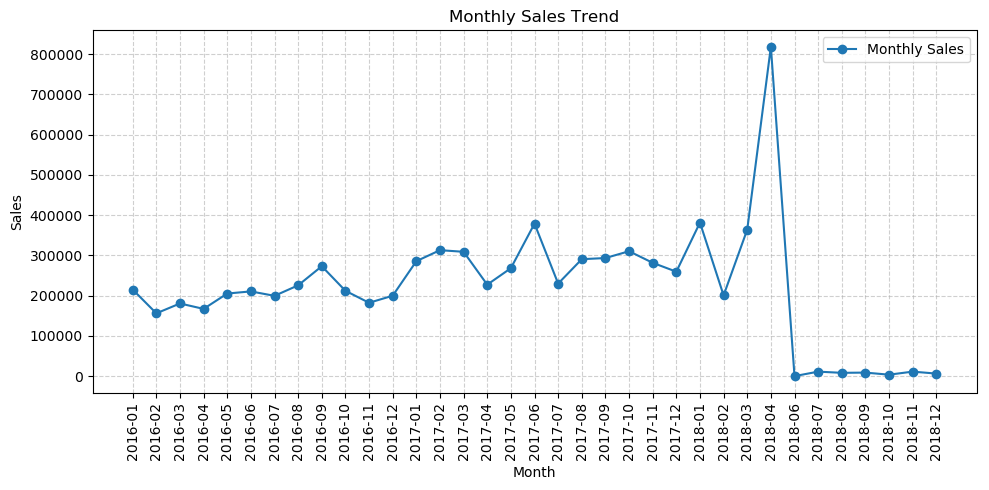

In [17]:
plt.figure(figsize=(10,5))
plt.plot(sales_growth_df['month'], sales_growth_df['sales'], marker='o', label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

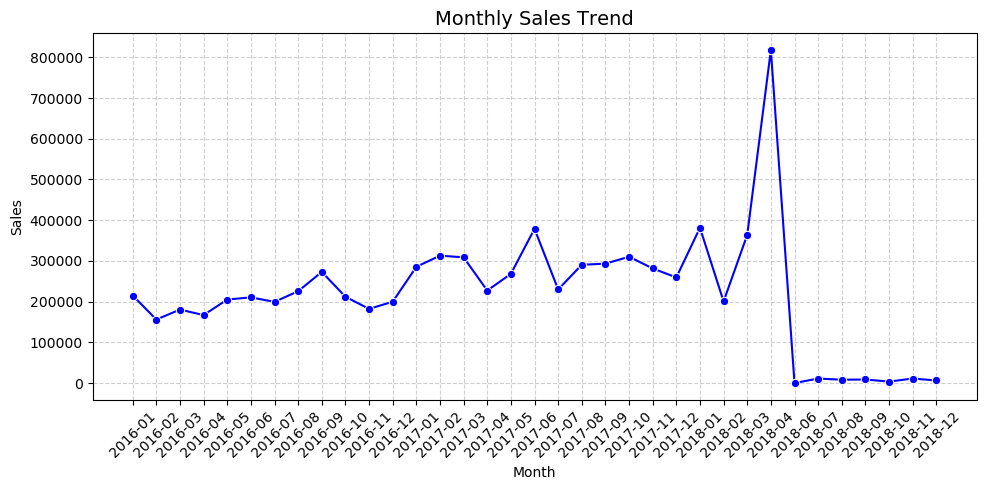

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='sales', data=sales_growth_df, marker='o', color='blue')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Find customers with the highest lifetime value

query = """
SELECT 
    c.first_name,
    c.last_name,
    AVG(oi.list_price)*COUNT(o.order_id) AS lifetime_value
FROM customers c
RIGHT JOIN orders o ON c.customer_id = o.customer_id
RIGHT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.first_name, c.last_name
ORDER BY lifetime_value DESC;
"""
pd.read_sql(query, conn)

DatabaseError: Execution failed on sql '
SELECT 
    c.first_name,
    c.last_name,
    AVG(oi.list_price)*COUNT(o.order_id)* AS lifetime_value
FROM customers c
RIGHT JOIN orders o ON c.customer_id = o.customer_id
RIGHT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.first_name, c.last_name
ORDER BY lifetime_value DESC;
': near "AS": syntax error